In [43]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [44]:
# Question: 1 Extracting Tesla stock data using yfinance

tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [45]:
# Question: 2 Extracting Tesla Revenue Data using Webscraping

# Load the HTML content from the URL
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
headers = {"User-Agent": "Mozilla/5.0"}

# Send HTTP request and parse HTML
response=requests.get(url,headers=headers)
soup=BS(response.text,"html.parser")

In [46]:
# Find all the tables
tables=soup.find_all("table")

In [47]:
# Extract Tesla revenue table
revenue_data_tesla=[]

for table in tables:
    if "Tesla Annual Revenue" in table.text:
        rows = table.find_all("tr")[1:]  # Skip header
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                try:
                    revenue_data_tesla.append([date, float(revenue)])
                except ValueError:
                    continue

# Convert to DataFrame
tesla_revenue = pd.DataFrame(revenue_data_tesla, columns=["Date", "Revenue"])
tesla_revenue = tesla_revenue.sort_values("Date")
# Display the DataFrame
tesla_revenue.tail(5)

,Date,Revenue
4,2017,11759.0
3,2018,21461.0
2,2019,24578.0
1,2020,31536.0
0,2021,53823.0


In [48]:
# Question: 3 Extracting Tesla stock data using yfinance

gamestop=yf.Ticker("GME")
gamestop_data=gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [49]:
# Question: 4 Extraction GameStop revenue data using webscraping

# URL of GameStop revenue data
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

headers={"User-Agent": "Mozilla/5.0"}

# Send HTTP request and parse HTML
response=requests.get(url,headers=headers)
soup=BS(response.text, "html.parser")

In [50]:
# Extract gamestop revenue table
revenue_data_gamestop=[]
tables=soup.find_all("table")

for table in tables:
    if "GameStop Annual Revenue" in table.text:
        rows = table.find_all("tr")[1:]  # Skip header
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                revenue_data_gamestop.append([date, revenue])
                try:
                    revenue_data_gamestop.append([date, float(revenue)])
                except ValueError:
                    continue

# Convert to DataFrame
gamestop_revenue = pd.DataFrame(revenue_data_gamestop, columns=["Date", "Revenue"])
gamestop_revenue=gamestop_revenue.sort_values("Date")
# Display the result
gamestop_revenue.tail(5)

,Date,Revenue
4,2018,8547
3,2019,8285.0
2,2019,8285
1,2020,6466.0
0,2020,6466


In [51]:
def make_graph(stock_data, revenue_data, company_name, color_stock='red', color_revenue='green'):
    """
    Create a matplotlib subplot with stock price and revenue data
    
    Parameters:
    stock_data: DataFrame with stock data (must have 'Date' and 'Close' columns)
    revenue_data: DataFrame with revenue data (must have 'Date' and 'Revenue' columns)
    company_name: String with company name for titles
    color_stock: Color for stock price line (default: 'red')
    color_revenue: Color for revenue line (default: 'green')
    """
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot 1: Stock Price
    ax1.plot(stock_data["Date"], stock_data["Close"], color=color_stock, linewidth=1)
    ax1.set_title(f"{company_name} Stock Price Over Time", fontsize=14, fontweight='bold')
    ax1.set_ylabel("Stock Price ($)", fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Revenue
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color=color_revenue, 
             linewidth=1, marker='o', markersize=4)
    ax2.set_title(f"{company_name} Annual Revenue", fontsize=14, fontweight='bold')
    ax2.set_xlabel("Year", fontsize=12)
    ax2.set_ylabel("Revenue ($ Millions)", fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)

Tesla Dashboard


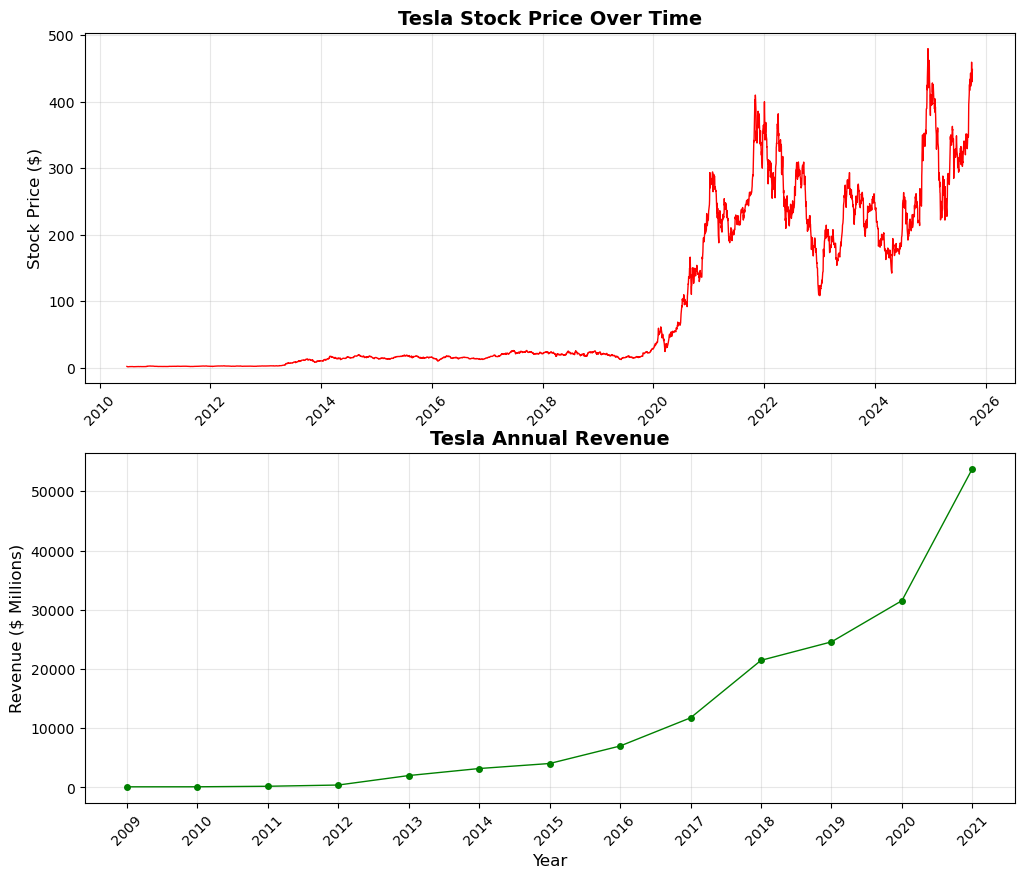

In [52]:
# Question 5 - Tesla Stock and Revenue Dashboard

print("Tesla Dashboard")
make_graph(tesla_data, tesla_revenue, "Tesla", color_stock='red', color_revenue='green')

GameStop Dashboard


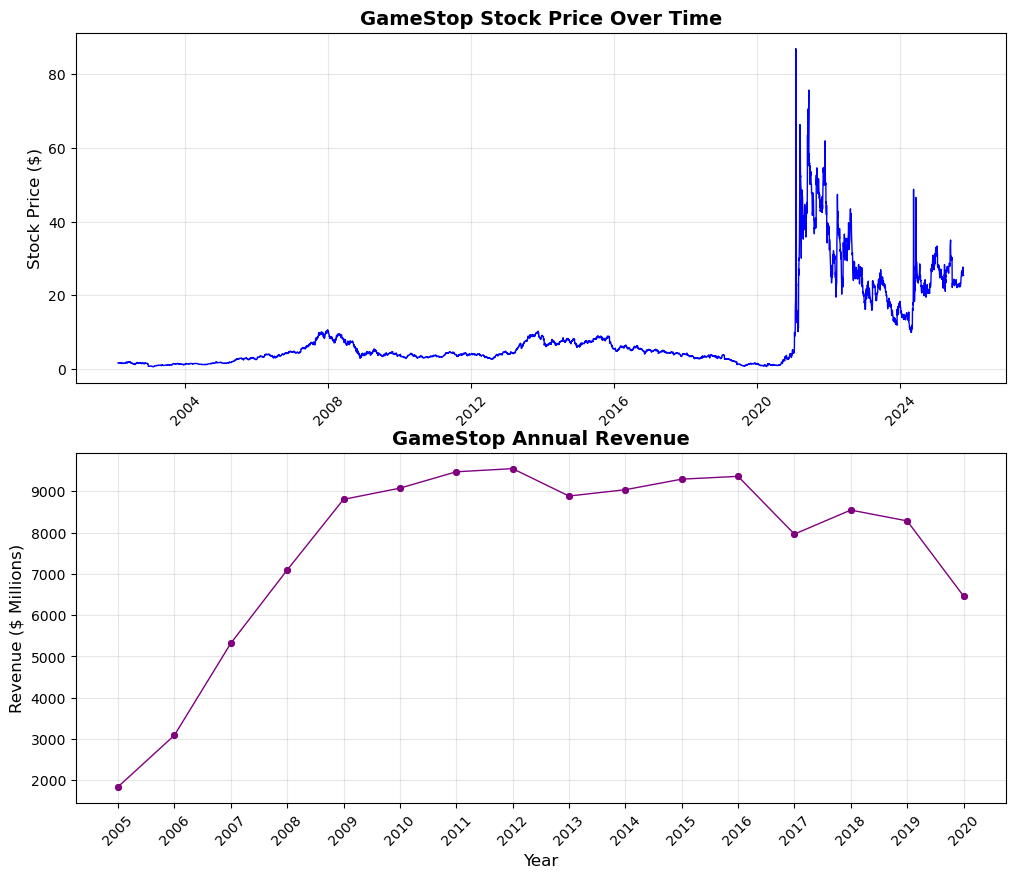

In [53]:
# Question 6 - Gamestop Stock and Revenue Dashboard

print("GameStop Dashboard")
make_graph(gamestop_data, gamestop_revenue, "GameStop", color_stock='blue', color_revenue='purple')